In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/ex2data1.txt',header=None)

In [3]:
dataset.columns = ["Test One","Test Two","Administration Decision"]

In [4]:
dataset.head()

,Test One,Test Two,Administration Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
dataset.describe()

,Test One,Test Two,Administration Decision
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# Visualizing the Dataset

In [6]:
not_admitted = dataset.loc[dataset["Administration Decision"]==0]
admitted = dataset.loc[dataset["Administration Decision"]==1]

In [7]:
test_one_admitted = admitted.iloc[:,0]
test_one_not_admitted = not_admitted.iloc[:,0]

In [8]:
test_two_admitted = admitted.iloc[:,1]
test_two_not_admitted = not_admitted.iloc[:,1]

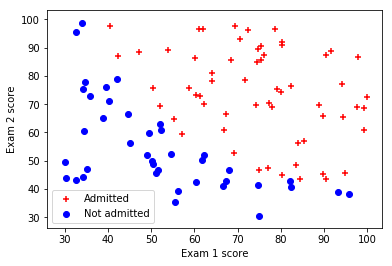

In [9]:
plt.scatter(test_one_admitted,test_two_admitted,c="r",marker="+")
plt.scatter(test_one_not_admitted,test_two_not_admitted,c="b",marker="o")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

# Feature Scaling

In [10]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,2].values

# Implement Sigmoid function

In [11]:
# 1/1+e(-x)
def sigmoid(z):
    return 1/(1+ np.exp(-z))

# Implement cost function

In [12]:
def getCost(X,y,theta):
    m = len(y)
    equation_metrix = np.dot(X,theta)
    predictions = sigmoid(equation_metrix)
    error = (-y*np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = sum(error)*1/m
    
    #gradient exactly same to the linear regression,but hypothesis is different
    gradient = 1/m* np.dot(X.T,(predictions-y))
    return cost,gradient

In [13]:
# Preparing parameters and values

In [14]:
X = np.append(np.ones(shape=(X.shape[0],1)),X,axis=1)

In [15]:
y = y.reshape((X.shape[0],1))

In [16]:
theta = np.zeros((X.shape[1],1))

In [17]:
cost,grad = getCost(X,y,theta)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is [0.69314718]
Gradient at initial theta (zeros): [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


# Optimizing G.D

Run mean normalization only for test1 and test2..otherwise extra added 1 column will throw an error <br>
(when X - mean ==0)

In [21]:
def normalization(X):
    mean = np.mean(X,axis=0)
    std  = np.std(X,axis=0)
    X_normalized = (X - mean)/std
    return X_normalized

In [22]:
normalized_columns = normalization(X[:,1:3])

In [24]:
X[:,1:3] = normalized_columns

In [38]:
history=[]
def gradientDescent(X,y,theta,learning_rate,num_iterations):
    m = len(y)
    for i in range(num_iterations):
        cost,grad = getCost(X,y,theta)
        theta = theta - learning_rate*grad
        history.append(cost[0])
    return theta

In [39]:
thetas = gradientDescent(X,y,theta,1,400)

In [41]:
thetas

array([[1.65947664],
       [3.8670477 ],
       [3.60347302]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

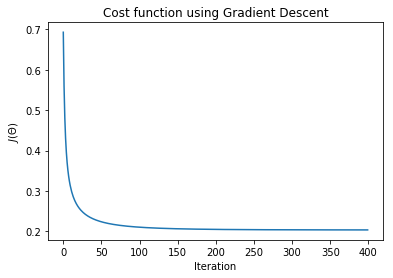

In [40]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [42]:
cos = getCost(X,y, thetas)

In [44]:
cos[0]

array([0.20359919])

# Plotting decision Boundary